In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [2]:
mn = pd.read_csv(r"/Users/himanshutalekar/Downloads/MNIST.csv")

In [3]:
mn.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
mn.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
mn.shape

(42000, 785)

In [7]:
mn.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [8]:
mn.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

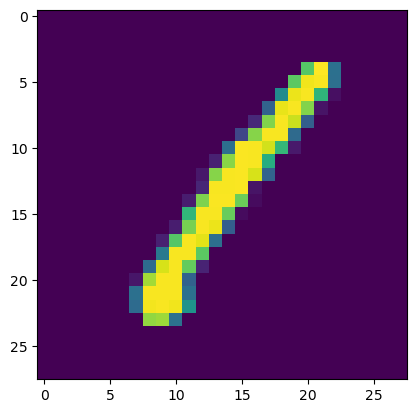

In [9]:
mn1 = mn.iloc[:,1::]
abcd = mn1.iloc[0]
abcd = np.array(abcd)
abcd = abcd.reshape(28,28)
plt.imshow(abcd)

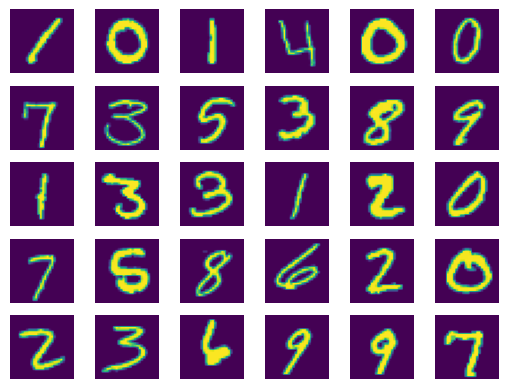

In [10]:
mn1 = mn.iloc[:,1::]
mn1 = np.array(mn1)
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(mn1[i,:].reshape(28,28))
    plt.axis('off')

Model Building



In [12]:
from sklearn.model_selection import train_test_split

In [13]:
mn_train , mn_test = train_test_split(mn,test_size=0.2)

In [14]:
mn_train_x = mn_train.iloc[:,1::]
mn_train_y = mn_train.iloc[:,0]

In [15]:
mn_test_x = mn_test.iloc[:,1::]
mn_test_y = mn_test.iloc[:,0]

In [16]:
mn_train_x = mn_train_x.astype("float32")
mn_test_x = mn_test_x.astype("float32")
mn_train_x = tf.keras.utils.normalize(mn_train_x)
mn_test_x = tf.keras.utils.normalize(mn_test_x)

Designing of Neural Network

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))

In [19]:
model.add(tf.keras.layers.Dense(64,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))

In [20]:
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

In [21]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [22]:
history = model.fit(mn_train_x,mn_train_y,epochs = 15 , validation_split = 0.2 , batch_size = 150)

Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5901 - loss: 1.3893 - val_accuracy: 0.9015 - val_loss: 0.3341
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9098 - loss: 0.3063 - val_accuracy: 0.9193 - val_loss: 0.2543
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9335 - loss: 0.2225 - val_accuracy: 0.9375 - val_loss: 0.2068
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9472 - loss: 0.1753 - val_accuracy: 0.9448 - val_loss: 0.1801
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9576 - loss: 0.1472 - val_accuracy: 0.9479 - val_loss: 0.1647
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9592 - loss: 0.1320 - val_accuracy: 0.9539 - val_loss: 0.1481
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9692 - loss: 0.1059 - val_accuracy: 0.9536 - val_loss: 0.1491
Epoch 8/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.0901 - val_accuracy: 0.

In [23]:
pred_values = model.predict(mn_test_x)
pred_values

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step


array([[5.4075855e-08, 9.3747985e-08, 1.4067424e-06, ..., 8.1778154e-11,
        6.6467425e-07, 9.0675335e-11],
       [2.6996911e-09, 5.6713268e-02, 1.9303838e-03, ..., 9.3673348e-01,
        1.2342155e-04, 3.1133191e-04],
       [4.0929066e-10, 1.8547255e-09, 1.4739039e-09, ..., 3.4314539e-06,
        1.1705916e-08, 5.3131185e-04],
       ...,
       [1.3828216e-09, 2.2817069e-08, 8.1819135e-12, ..., 2.6516356e-09,
        3.0020448e-07, 9.5189868e-14],
       [1.8474100e-08, 8.4056509e-08, 1.0118634e-07, ..., 4.0077259e-07,
        4.3648679e-06, 1.3209670e-06],
       [2.8657636e-08, 7.8893088e-02, 1.7674631e-02, ..., 8.9801782e-01,
        3.1614900e-03, 1.7419241e-03]], dtype=float32)

In [24]:
pred_classes = np.argmax(pred_values,axis = 1)


In [25]:
pred_classes

array([6, 7, 4, ..., 5, 4, 7])

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(mn_test_y,pred_classes)

array([[849,   0,   5,   1,   1,   4,   4,   2,   3,   1],
       [  0, 929,   8,   2,   0,   1,   1,   2,   3,   1],
       [  0,   2, 826,   6,   4,   1,   1,   7,   3,   1],
       [  0,   5,   9, 836,   0,  27,   1,   7,   5,   6],
       [  0,   4,   1,   0, 780,   2,   6,   5,   1,  13],
       [  3,   0,   1,   6,   1, 726,   2,   1,   4,   3],
       [  1,   1,   0,   0,   2,  12, 791,   0,   3,   0],
       [  0,   2,   4,   0,   1,   2,   0, 840,   0,   7],
       [  2,   4,   1,   7,   1,  12,   2,   1, 738,   4],
       [  1,   2,   1,   8,  15,   7,   0,  10,   3, 792]])

In [27]:
accuracy_score(mn_test_y,pred_classes)

0.9651190476190477

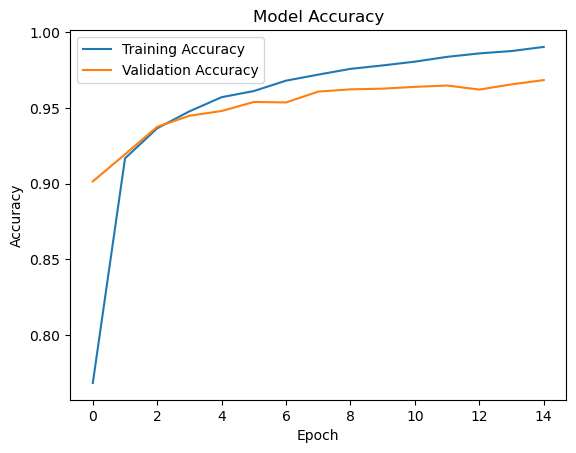

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

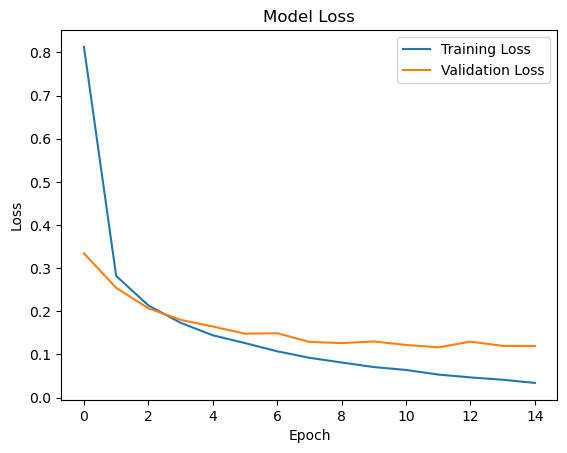

In [55]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
